# AI Tango

## Model Experiments - Gradient Boosting


In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from pose_parser.learning import model_builder as mb
from scipy.stats import randint

# Reloader
import importlib

# Mapping string categories to numerical
value_map = {
    "weight_transfer_type": {
        "Failure Weight Transfer": 0,
        "Successful Weight Transfer": 1,
    },
    "step_type": {
        "Left Step": 0,
        "Right Step": 1,
    },
}
# Columns we know we'll always want to drop
drop_list = ["video_id"]
# Only keep these columns (including target)
column_whitelist = []


In [ ]:
# this one is the original "avg dataset used"
# data_file = "./data/annotated_videos/dataset_1678732901064497000.csv"

# this one includes more pooled stats (max)
# data_file = "./data/annotated_videos/dataset_1679002854718304000.csv"

# this one is 45 frame window pooled
# data_file = "./data/annotated_videos/dataset_1679015606654767000.csv"

# this one is 25 frame window pooled
# data_file = "./data/annotated_videos/dataset_1679016147487099000.csv"

# this one is a flat column representation frame by frame angles of a labeled 10 frame window
# data_file = "./data/annotated_videos/dataset_1679087888313443000.csv"

# this one is a flat column representation frame by frame angles of a labeled 25 frame window
# data_file = "./data/annotated_videos/dataset_1679103956737220000.csv"

# this one is split on step type with distances and averages pooled over all frames within example
# data_file = "./data/annotated_videos/dataset_1679710901767607000.csv"


# Dataset 1  
## 45 Frame Window, pooled Avg / STD / Max

### Test 1 - Random upsampled minority class 

Training Balance for weight_transfer_type:
1    530
0    530
Name: weight_transfer_type, dtype: int64


/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Mean ROC AUC from cross validation: 1.000
Min ROC AUC from cross validation: 1.000
Max ROC AUC from cross validation: 1.000
Classification Metrics:
Accuracy: 0.8645
Precision: 0.8784
Recall: 0.9774
F1 Score: 0.9253
ROC AUC: 0.8404

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.18      0.28        22
           1       0.88      0.98      0.93       133

    accuracy                           0.86       155
   macro avg       0.72      0.58      0.60       155
weighted avg       0.83      0.86      0.83       155



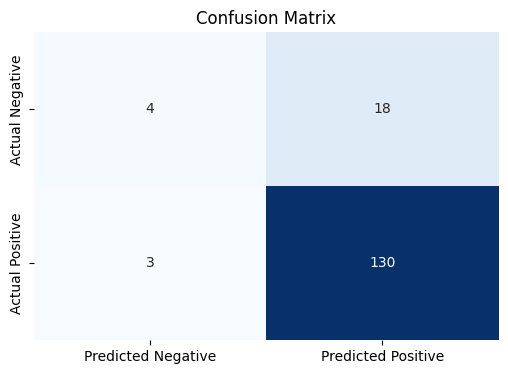

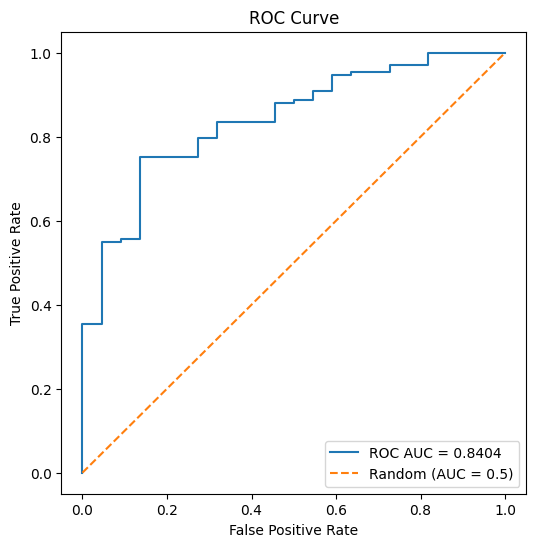

In [4]:
data_file = "../../data/annotated_videos/dataset_1679015606654767000.csv"
column_whitelist = []

# reload model builder class (iterating on it a lot)
importlib.reload(mb)
model_builder = mb.ModelBuilder()

model_builder.load_and_prep_dataset_from_csv(
    path=data_file,
    target="weight_transfer_type",
    value_map=value_map,
    column_whitelist=column_whitelist,
    drop_list=drop_list,
)

model_builder.set_train_test_split(
    balance_off_target=True,
    upsample_minority=True,
    downsample_majority=False,
    use_SMOTE=False,
    random_state=40002,
)
# model_builder.run_pca(num_components=200)

param_dist = {
    "n_estimators": randint(400, 600),
    "max_depth": randint(9, 15),
    "max_features": randint(4, 12),
}
rf_params = {
    # "class_weight": "balanced_subsample",
    # "class_weight": "balanced",
    "n_estimators": 600,
    "max_depth": 9,
    "max_leaf_nodes": 63,
}

model_builder.train_gradient_boost()
model_builder.evaluate_model()

### Test 2 - upsample with SMOTE

Training Balance for weight_transfer_type:
1    530
0    530
Name: weight_transfer_type, dtype: int64


/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Mean ROC AUC from cross validation: 1.000
Min ROC AUC from cross validation: 1.000
Max ROC AUC from cross validation: 1.000
Classification Metrics:
Accuracy: 0.8258
Precision: 0.8732
Recall: 0.9323
F1 Score: 0.9018
ROC AUC: 0.7666

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.18      0.23        22
           1       0.87      0.93      0.90       133

    accuracy                           0.83       155
   macro avg       0.59      0.56      0.57       155
weighted avg       0.79      0.83      0.81       155



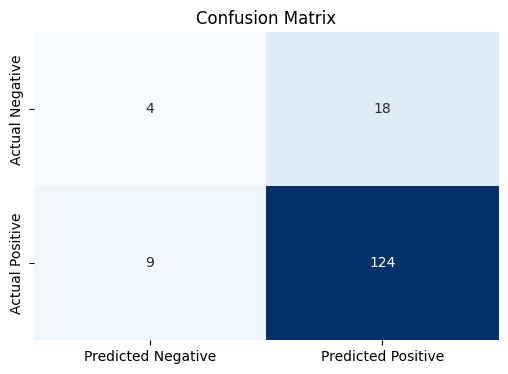

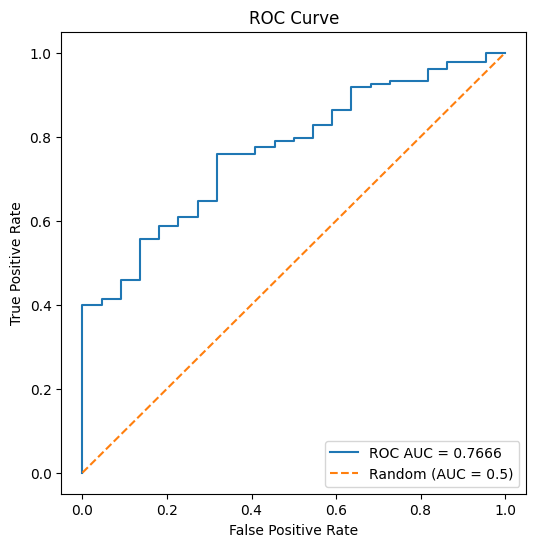

In [5]:
data_file = "../../data/annotated_videos/dataset_1679015606654767000.csv"
column_whitelist = []

# reload model builder class (iterating on it a lot)
importlib.reload(mb)
model_builder = mb.ModelBuilder()

model_builder.load_and_prep_dataset_from_csv(
    path=data_file,
    target="weight_transfer_type",
    value_map=value_map,
    column_whitelist=column_whitelist,
    drop_list=drop_list,
)

model_builder.set_train_test_split(
    balance_off_target=True,
    upsample_minority=True,
    downsample_majority=False,
    use_SMOTE=True,
    random_state=40002,
)
# model_builder.run_pca(num_components=200)

param_dist = {
    "n_estimators": randint(400, 600),
    "max_depth": randint(9, 15),
    "max_features": randint(4, 12),
}
rf_params = {
    # "class_weight": "balanced_subsample",
    # "class_weight": "balanced",
    "n_estimators": 600,
    "max_depth": 9,
    "max_leaf_nodes": 63,
}

model_builder.train_gradient_boost()
model_builder.evaluate_model()

### Test 3 - 10 frame window with flat column angles, randomly upsampled

Training Balance for weight_transfer_type:
0    2413
1    2413
Name: weight_transfer_type, dtype: int64


/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Mean ROC AUC from cross validation: 1.000
Min ROC AUC from cross validation: 1.000
Max ROC AUC from cross validation: 1.000
Classification Metrics:
Accuracy: 0.8793
Precision: 0.9016
Recall: 0.9633
F1 Score: 0.9314
ROC AUC: 0.8455

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.40      0.50       105
           1       0.90      0.96      0.93       599

    accuracy                           0.88       704
   macro avg       0.78      0.68      0.71       704
weighted avg       0.86      0.88      0.87       704



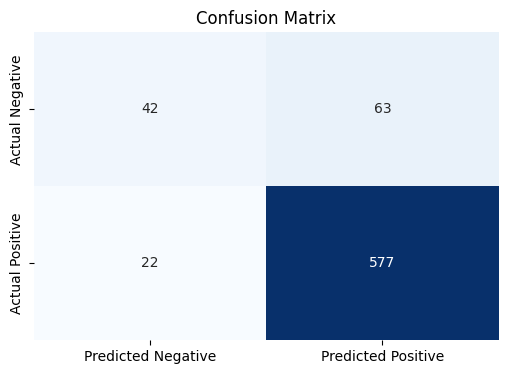

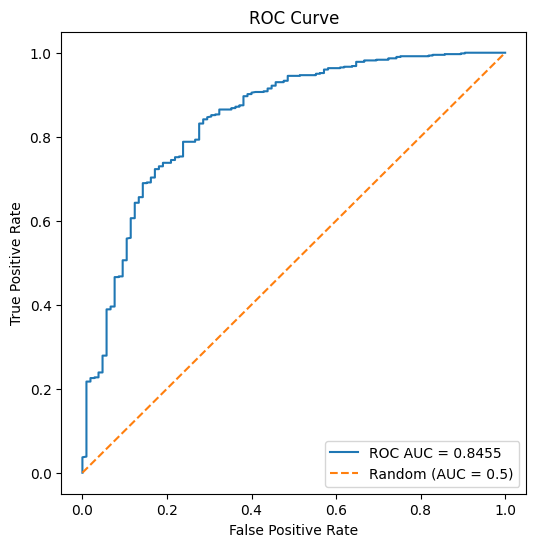

In [7]:
data_file = "../../data/annotated_videos/dataset_1679087888313443000.csv"
column_whitelist = []

# reload model builder class (iterating on it a lot)
importlib.reload(mb)
model_builder = mb.ModelBuilder()

model_builder.load_and_prep_dataset_from_csv(
    path=data_file,
    target="weight_transfer_type",
    value_map=value_map,
    column_whitelist=column_whitelist,
    drop_list=drop_list,
)

model_builder.set_train_test_split(
    balance_off_target=True,
    upsample_minority=True,
    downsample_majority=False,
    use_SMOTE=False,
    random_state=40002,
)
# model_builder.run_pca(num_components=200)

param_dist = {
    "n_estimators": randint(400, 600),
    "max_depth": randint(9, 15),
    "max_features": randint(4, 12),
}
rf_params = {
    # "class_weight": "balanced_subsample",
    # "class_weight": "balanced",
    "n_estimators": 600,
    "max_depth": 9,
    "max_leaf_nodes": 63,
}

model_builder.train_gradient_boost()
model_builder.evaluate_model()

# Dataset 2
### Split on step type (full step example) with pooled features over the temporal window with normalized and nonnormalized angles and distances.

### Test 1 - target Step Tyoe

Training Balance for step_type:
0    247
1    247
Name: step_type, dtype: int64


/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Mean ROC AUC from cross validation: 1.000
Min ROC AUC from cross validation: 1.000
Max ROC AUC from cross validation: 1.000
Classification Metrics:
Accuracy: 0.9333
Precision: 0.8971
Recall: 0.9839
F1 Score: 0.9385
ROC AUC: 0.9892

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93        58
           1       0.90      0.98      0.94        62

    accuracy                           0.93       120
   macro avg       0.94      0.93      0.93       120
weighted avg       0.94      0.93      0.93       120



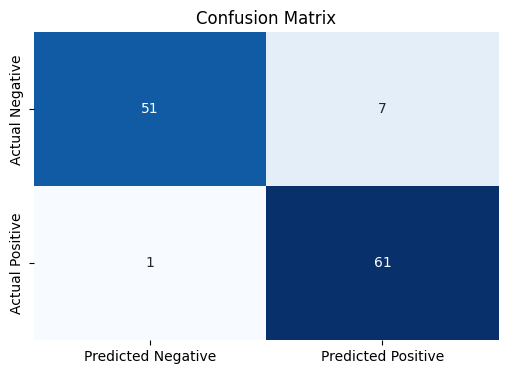

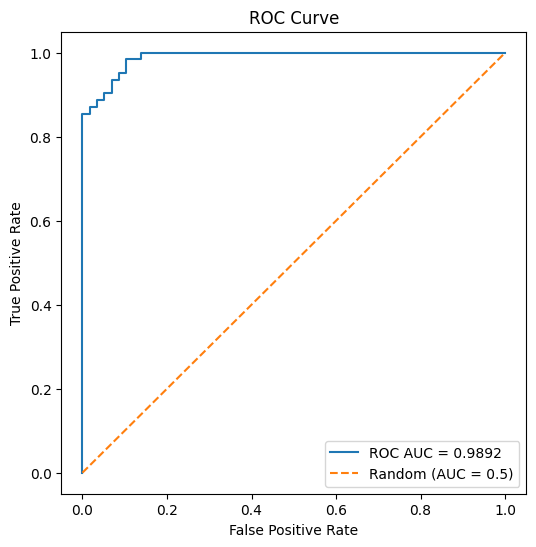

In [9]:
data_file = "../../data/annotated_videos/dataset_1679710901767607000.csv"
column_whitelist = []

# reload model builder class (iterating on it a lot)
importlib.reload(mb)
model_builder = mb.ModelBuilder()

model_builder.load_and_prep_dataset_from_csv(
    path=data_file,
    target="step_type",
    value_map=value_map,
    column_whitelist=column_whitelist,
    drop_list=drop_list,
)

model_builder.set_train_test_split(
    balance_off_target=True,
    upsample_minority=True,
    downsample_majority=False,
    use_SMOTE=False,
    random_state=40002,
)
# model_builder.run_pca(num_components=200)

param_dist = {
    "n_estimators": randint(400, 600),
    "max_depth": randint(9, 15),
    "max_features": randint(4, 12),
}
rf_params = {
    # "class_weight": "balanced_subsample",
    # "class_weight": "balanced",
    "n_estimators": 600,
    "max_depth": 9,
    "max_leaf_nodes": 63,
}

model_builder.train_gradient_boost()
model_builder.evaluate_model()

Wow - seems like we can definitely predict left versus right step. Makes sense, the data should be different for sure.

### Test 2 - Compare with random forest

Training Balance for weight_transfer_type:
1    413
0    413
Name: weight_transfer_type, dtype: int64
Mean ROC AUC from cross validation: 1.000
Min ROC AUC from cross validation: 0.997
Max ROC AUC from cross validation: 1.000
Top 5 features
{'angles_std.right_elbow_right_wrist_to_plumb_line_angle_2d_degrees': '2.4130705300045325%'}
{'angles_max.left_shoulder_left_elbow_to_right_elbow_right_wrist_angle_2d_degrees': '2.1251726288797204%'}
{'angles_avg.left_shoulder_left_elbow_to_right_elbow_right_wrist_angle_2d_degrees': '2.1120381004435704%'}
{'angles_std.neck_right_shoulder_to_plumb_line_angle_2d_degrees': '1.5754305623249012%'}
{'angles_std.neck_mid_hip_to_plumb_line_angle_2d_degrees': '1.5078809222560343%'}
Classification Metrics:
Accuracy: 0.8833
Precision: 0.9204
Recall: 0.9541
F1 Score: 0.9369
ROC AUC: 0.7181

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.18      0.22        11
           1       0.92      0.95      0.

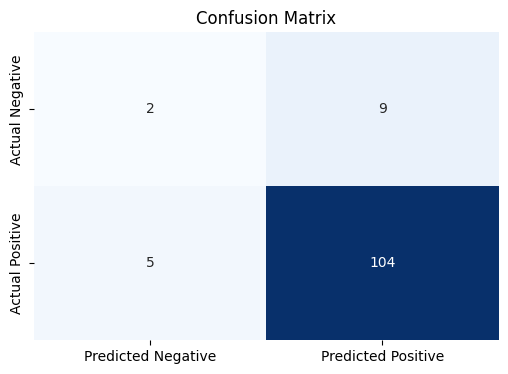

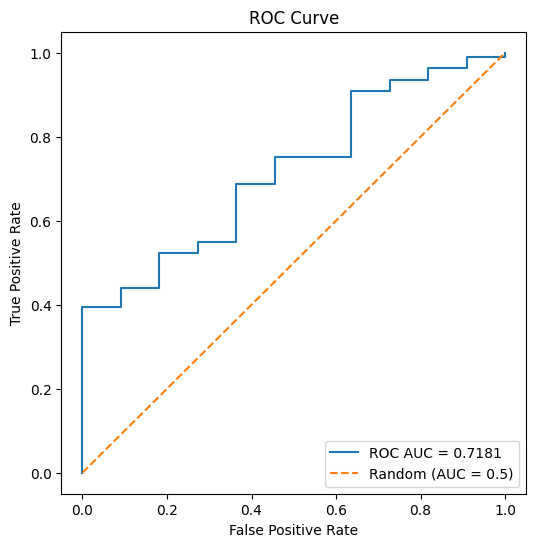

In [11]:
data_file = "../../data/annotated_videos/dataset_1679710901767607000.csv"
column_whitelist = []

# reload model builder class (iterating on it a lot)
importlib.reload(mb)
model_builder = mb.ModelBuilder()

model_builder.load_and_prep_dataset_from_csv(
    path=data_file,
    target="weight_transfer_type",
    value_map=value_map,
    column_whitelist=column_whitelist,
    drop_list=drop_list,
)

model_builder.set_train_test_split(
    balance_off_target=True,
    upsample_minority=True,
    downsample_majority=False,
    use_SMOTE=False,
    random_state=40002,
)
# model_builder.run_pca(num_components=200)

param_dist = {
    "n_estimators": randint(400, 600),
    "max_depth": randint(9, 15),
    "max_features": randint(4, 12),
}
rf_params = {
    # "class_weight": "balanced_subsample",
    # "class_weight": "balanced",
    "n_estimators": 600,
    "max_depth": 9,
    "max_leaf_nodes": 63,
}

model_builder.train_random_forest(params= rf_params)
model_builder.evaluate_model()